Chapter 23

# 马氏距离和卡方分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码生成协方差矩阵为 $$\Sigma = \begin{bmatrix} 5 & 3 \\ 3 & 5 \end{bmatrix}$$ 的二维正态分布数据，并通过计算马氏距离绘制等高线图，以展示不同区域的分布密度。 

1. **数据生成**：通过均值 $\mu = [0, 0]$ 和协方差矩阵 $\Sigma$ 生成1000个二维数据点。定义取值范围为 $[-3, 3]$ 的网格 $(x_1, x_2)$ ，用以计算网格上各点的马氏距离。

2. **马氏距离计算**：使用马氏距离公式：
   $$
   D_M(x) = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)}
   $$
   在网格点上计算距离。马氏距离用于测量任意点到中心的距离，同时考虑数据分布的形状和方向。

3. **绘制马氏距离等高线图**：将马氏距离的等高线图与数据点分布一同绘制，通过 `matplotlib` 中的 `contour` 绘制等距马氏距离的轮廓线，颜色代表不同的马氏距离。

4. **卡方分布映射**：最后，以 $\chi^2$ 分布的百分位数 $\chi^2(p, df=2)$ 映射马氏距离，其中 $p \in [0.9, 0.99]$，并转换为其平方根，以定义置信椭圆，这些椭圆代表不同置信水平下数据的密度区域。

## 导入所需的库

In [1]:
import numpy as np  # 导入数值计算库
from sklearn.covariance import EmpiricalCovariance  # 导入协方差计算模块

## 初始化协方差矩阵与均值向量

In [2]:
SIGMA = np.array([[5, 3], [3, 5]]) / 8  # 定义协方差矩阵
mu = np.array([0, 0])  # 定义均值向量

## 生成多元正态分布随机数据

In [3]:
R1, R2 = np.random.multivariate_normal(mu, SIGMA, 1000).T  # 生成1000个数据点并转置

## 定义网格范围

In [4]:
x1 = np.linspace(-3, 3, 100)  # x1方向上的范围
x2 = x1 

[X1, X2] = np.meshgrid(x1, x2)  # 创建x1和x2的网格

X = np.array([X1.flatten(), X2.flatten()]).T  # 将网格展平，并组合成坐标点数组

## 计算马氏距离网格

In [5]:
emp_cov_Xc = EmpiricalCovariance().fit(np.vstack((R1, R2)).T)  # 计算经验协方差

mahal_sq_Xc = emp_cov_Xc.mahalanobis(X)  # 计算马氏距离的平方
mahal_sq_Xc = mahal_sq_Xc.reshape(X1.shape)  # 将结果重塑为网格形状
mahal_d_Xc = np.sqrt(mahal_sq_Xc)  # 计算马氏距离

## 绘制马氏距离等高线

(-3.0, 3.0, -3.381193597118481, 3.0)

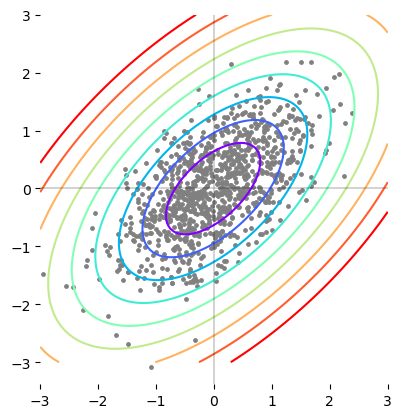

In [6]:
import matplotlib.pyplot as plt  # 导入绘图库

levels = np.linspace(1, 5, 9)  # 设置等高线的水平

fig, ax = plt.subplots()  # 创建绘图窗口

ax.contour(X1, X2, mahal_d_Xc, levels=levels, cmap='rainbow')  # 绘制马氏距离等高线
plt.scatter(R1, R2, s=6, color=[0.5, 0.5, 0.5])  # 绘制随机数据散点图

ax.axhline(y=0, color='k', linewidth=0.25)  # 绘制y轴参考线
ax.axvline(x=0, color='k', linewidth=0.25)  # 绘制x轴参考线
ax.set_xlim(-3, 3)  # 设置x轴显示范围
ax.set_ylim(-3, 3)  # 设置y轴显示范围
ax.spines['top'].set_visible(False)  # 隐藏上边框
ax.spines['right'].set_visible(False)  # 隐藏右边框
ax.spines['bottom'].set_visible(False)  # 隐藏下边框
ax.spines['left'].set_visible(False)  # 隐藏左边框
plt.axis('scaled')  # 设置坐标比例相同

## 根据卡方分布绘制马氏距离等高线

(-3.0, 3.0, -3.381193597118481, 3.0)

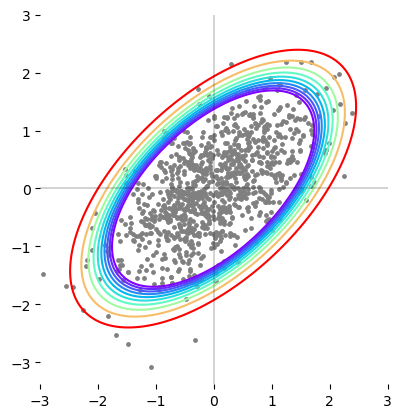

In [7]:
intervals = np.linspace(0.9, 0.99, 10)  # 定义置信区间

from scipy.stats.distributions import chi2  # 导入卡方分布模块

dist_chi2_sqrt = np.sqrt(chi2.ppf(intervals, df=2))  # 计算对应卡方分布的分位数

fig, ax = plt.subplots()  # 创建新的绘图窗口

ax.contour(X1, X2, mahal_d_Xc, levels=dist_chi2_sqrt, cmap='rainbow')  # 绘制马氏距离的卡方分布等高线
plt.scatter(R1, R2, s=6, color=[0.5, 0.5, 0.5])  # 绘制随机数据散点图

ax.axhline(y=0, color='k', linewidth=0.25)  # 绘制y轴参考线
ax.axvline(x=0, color='k', linewidth=0.25)  # 绘制x轴参考线
ax.set_xlim(-3, 3)  # 设置x轴显示范围
ax.set_ylim(-3, 3)  # 设置y轴显示范围
ax.spines['top'].set_visible(False)  # 隐藏上边框
ax.spines['right'].set_visible(False)  # 隐藏右边框
ax.spines['bottom'].set_visible(False)  # 隐藏下边框
ax.spines['left'].set_visible(False)  # 隐藏左边框
plt.axis('scaled')  # 设置坐标比例相同